In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
pd.set_option('display.max_columns', 100)
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import pickle
import warnings
warnings.filterwarnings('ignore')


In [85]:
df = pd.read_excel("Data_Train.xlsx")

In [86]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [88]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [89]:
df.describe(include=['object'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [90]:
df.dropna(inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


# Cleaning the data

### Reducing redundant similar airways companies

In [92]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [93]:
replace = {"Multiple carriers Premium economy":"Multiple carriers",
            "Jet Airways Business" : "Jet Airways",
            "Vistara Premium economy" : "Vistara",
            "Trujet" : "Jet Airways"}
df['Airline'] = df['Airline'].map(replace).fillna(df['Airline'])

In [94]:
df['Airline'].value_counts()

Jet Airways          3856
IndiGo               2053
Air India            1751
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

### Getting month time of Journey date 

In [95]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

C:\Users\Khaled\AppData\Local\Temp\ipykernel_5308\4110469324.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [96]:
df['Date_of_Journey'].dtype

dtype('<M8[ns]')

In [97]:
df['Date_Journey_Month'] = df['Date_of_Journey'].dt.month

df['Date_Journey_Month'].value_counts().sort_index()

1     1075
3     2211
4      424
5     2074
6     2535
9     1406
12     957
Name: Date_Journey_Month, dtype: int64

### Reducing redundancy in Source and Destination Features

In [98]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [99]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [100]:
df['Destination'] = df['Destination'].str.replace("New Delhi","Delhi")

In [101]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey_Month
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1


### Extracting Minutes and Hours from Departure and Arrival time 

In [102]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

df["Dep_Time_minutes"] = df['Dep_Time'].dt.minute

df['Dep_Time_Hours'] = df['Dep_Time'].dt.hour

In [103]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey_Month,Dep_Time_minutes,Dep_Time_Hours
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2023-07-24 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,20,22
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-24 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,50,5


In [104]:
df['Arrival_Time'].value_counts().tail(10)

13:00 02 Mar    1
03:35 13 Jun    1
07:10 10 Apr    1
00:50 04 May    1
00:50 02 Jun    1
00:25 02 Jun    1
08:55 13 Mar    1
11:05 19 May    1
12:30 22 May    1
21:20 13 Mar    1
Name: Arrival_Time, dtype: int64

In [105]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

df['Arrival_Time_Hours'] = df['Arrival_Time'].dt.hour

df['Arrival_Time_Minutes'] = df['Arrival_Time'].dt.minute

In [106]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey_Month,Dep_Time_minutes,Dep_Time_Hours,Arrival_Time_Hours,Arrival_Time_Minutes
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2023-07-24 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,20,22,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-24 05:50:00,2023-07-24 13:15:00,7h 25m,2 stops,No info,7662,1,50,5,13,15


### Preprocessing Duration

In [107]:
def preprocess_duration(x):
    if "h" not in x:
        x = "0h" + " " + x
    elif "m" not in x:
        x= x + " " + "0m"
        
    return x

In [108]:
df['Duration'] = df['Duration'].apply(preprocess_duration)

In [109]:
df['Duration_Hour'] = df['Duration'].apply(lambda x : int(x.split(" ")[0][0:-1]))
df['Duration_Minutes'] = df['Duration'].apply(lambda x : int(x.split(" ")[1][0:-1]))

In [110]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey_Month,Dep_Time_minutes,Dep_Time_Hours,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hour,Duration_Minutes
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2023-07-24 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,20,22,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-24 05:50:00,2023-07-24 13:15:00,7h 25m,2 stops,No info,7662,1,50,5,13,15,7,25


### Converting Stops to numerical form

In [111]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [112]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

df['Total_Stops'] = df['Total_Stops'].map(stops)

In [113]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey_Month,Dep_Time_minutes,Dep_Time_Hours,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hour,Duration_Minutes
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2023-07-24 22:20:00,2023-03-22 01:10:00,2h 50m,0,No info,3897,3,20,22,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-24 05:50:00,2023-07-24 13:15:00,7h 25m,2,No info,7662,1,50,5,13,15,7,25


### Dropping unnecessary Columns

In [114]:
df.drop(columns=['Date_of_Journey',"Dep_Time",'Arrival_Time','Duration','Additional_Info','Route'],inplace=True)

In [115]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Date_Journey_Month,Dep_Time_minutes,Dep_Time_Hours,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hour,Duration_Minutes
0,IndiGo,Banglore,Delhi,0,3897,3,20,22,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,50,5,13,15,7,25


### One Hot Encoding

In [116]:
df_encode = pd.get_dummies(df[['Airline','Source','Destination']])

In [117]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date_Journey_Month,Dep_Time_minutes,Dep_Time_Hours,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hour,Duration_Minutes
0,IndiGo,Banglore,Delhi,0,3897,3,20,22,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,50,5,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,25,9,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,50,16,21,35,4,45


In [118]:
df = pd.concat([df,df_encode], axis =1)

In [119]:
df.drop(columns=['Airline','Source','Destination'], inplace=True)

In [120]:
print(df.shape)
df.head()

(10682, 27)


,Total_Stops,Price,Date_Journey_Month,Dep_Time_minutes,Dep_Time_Hours,Arrival_Time_Hours,Arrival_Time_Minutes,Duration_Hour,Duration_Minutes,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,3,20,22,1,10,2,50,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,2,7662,1,50,5,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,2,13882,9,25,9,4,25,19,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,6218,12,5,18,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,1,13302,1,50,16,21,35,4,45,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


### Removing Outliers

In [121]:
px.box(df,x=df['Price'])

In [122]:
px.histogram(df,x=df['Price'])

In [123]:
print(df['Price'].max())
print(df['Price'].min())

79512
1759


In [124]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)

iqr = q3 - q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [125]:
df['Price'].clip(lower=minimum, upper=maximum, inplace =True)

In [126]:
px.box(df,x=df['Price'])

### Building the Model

#### Splitting the data

In [127]:
X = df.drop(columns="Price")
print(X.shape)
y = df['Price']
print(y.shape)

(10682, 26)
(10682,)


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8545, 26)
(2137, 26)
(8545,)
(2137,)


#### First model

In [129]:
rf = RandomForestRegressor()

In [130]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [131]:
y_pred = rf.predict(X_test)

In [132]:
rf.score(X_train,y_train)

0.8840937759368994

In [133]:
metrics.r2_score(y_test , y_pred)

0.7142566676419886

In [134]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    sns.distplot(y_test - y_predection)

Training score : 0.8841714182578038
predictions are : [16717.64        5734.16166667  8717.77       ...  6334.58445238
 12631.01       11346.34397619]


r2 score : 0.7144367862169295
MAE : 1470.7471558623565
MSE : 5327038.890088574
RMSE : 2308.0378874898424


C:\Users\Khaled\AppData\Local\Temp\ipykernel_5308\2331296516.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




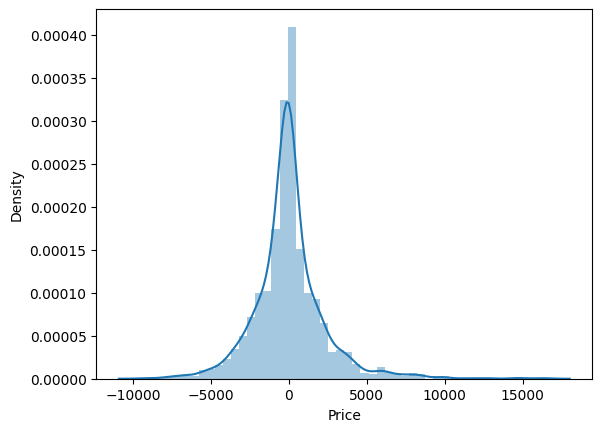

In [135]:
predict(RandomForestRegressor())

Training score : 0.8952164070454225
predictions are : [16840.   5135.   9082.5 ...  6301.5 13339.  10703. ]


r2 score : 0.6351950836642319
MAE : 1605.5899890768515
MSE : 6805253.207762278
RMSE : 2608.688024230241


C:\Users\Khaled\AppData\Local\Temp\ipykernel_5308\2331296516.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




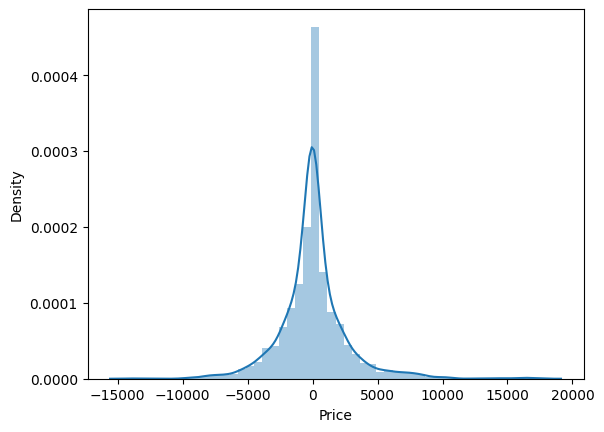

In [136]:
predict(DecisionTreeRegressor())

Training score : 0.588003183129771
predictions are : [14090.09452381  7312.09470344  9155.63277187 ...  6937.11741107
 11404.34266183 11429.02398891]


r2 score : 0.5645068029189932
MAE : 2036.0234499919006
MSE : 8123907.720767727
RMSE : 2850.2469578560604


C:\Users\Khaled\AppData\Local\Temp\ipykernel_5308\2331296516.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




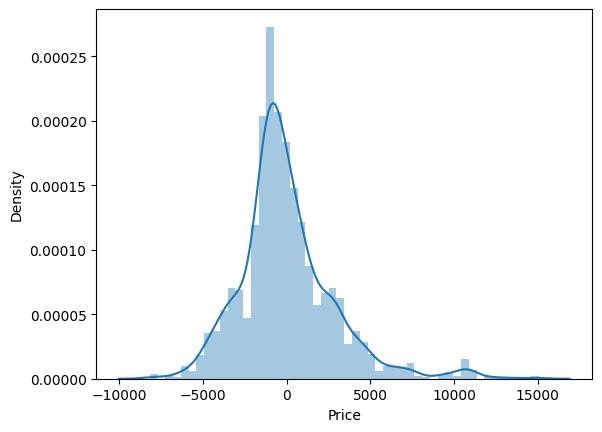

In [137]:
predict(LinearRegression())

Training score : 0.5880028724930395
predictions are : [14085.6920623   7321.70616176  9153.72484377 ...  6944.82638747
 11403.0000563  11426.58973816]


r2 score : 0.5644774177156311
MAE : 2036.1118624813193
MSE : 8124455.887035467
RMSE : 2850.3431174220877


C:\Users\Khaled\AppData\Local\Temp\ipykernel_5308\2331296516.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




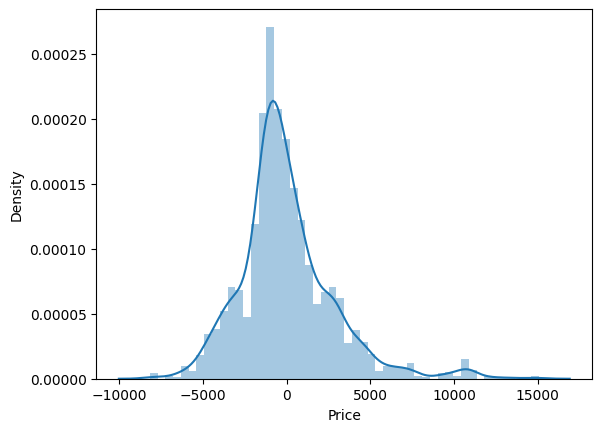

In [138]:
predict(Ridge())

Training score : 0.45095654439622535
predictions are : [10557.41772463  9152.03802863  9075.8938272  ...  9623.72779947
 10281.63990583  8763.58077268]


r2 score : 0.4303654234497082
MAE : 2443.2279970767527
MSE : 10626248.045827389
RMSE : 3259.792638470642


C:\Users\Khaled\AppData\Local\Temp\ipykernel_5308\2331296516.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




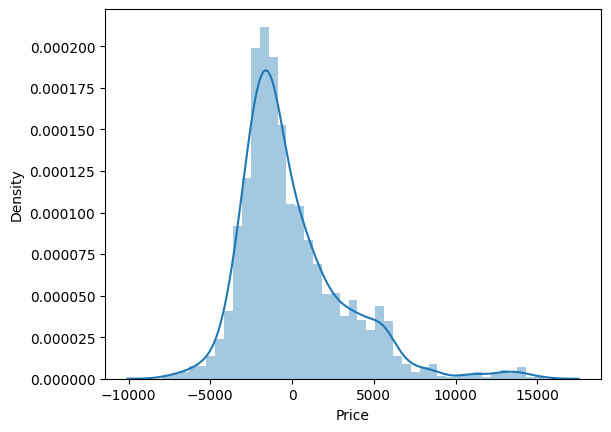

In [139]:
predict(ElasticNet())

Training score : 0.5879893071925348
predictions are : [14072.11137059  7376.24585883  9133.74124463 ...  6982.87909718
 11399.56137135 11420.32049736]


r2 score : 0.5642014237428215
MAE : 2036.5596566381082
MSE : 8129604.416522546
RMSE : 2851.2461164414667


C:\Users\Khaled\AppData\Local\Temp\ipykernel_5308\2331296516.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




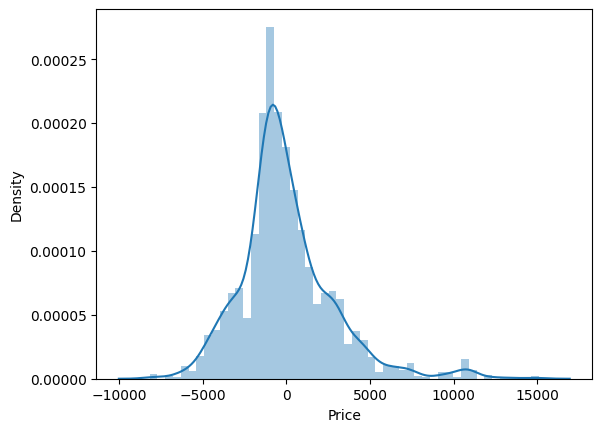

In [140]:
predict(Lasso())

Training score : 0.009478073409784571
predictions are : [8320.02321188 8351.7372232  8287.87770148 ... 8288.27952648 8238.233067
 8207.21400839]


r2 score : 0.006159141742998364
MAE : 3491.713949011612
MSE : 18539604.00696373
RMSE : 4305.764044506355


C:\Users\Khaled\AppData\Local\Temp\ipykernel_5308\2331296516.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




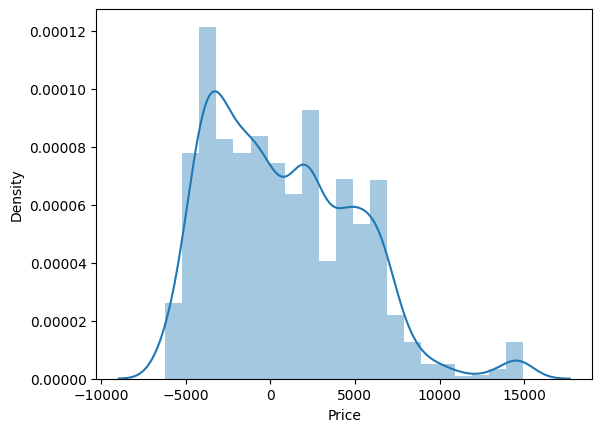

In [141]:
predict(SVR())

Training score : 0.7432350128251252
predictions are : [16315.   6207.   8536.  ...  6993.2  6821.4 12756. ]


r2 score : 0.5862958490267294
MAE : 1781.3591951333644
MSE : 7717443.966364061
RMSE : 2778.0287914930004


C:\Users\Khaled\AppData\Local\Temp\ipykernel_5308\2331296516.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




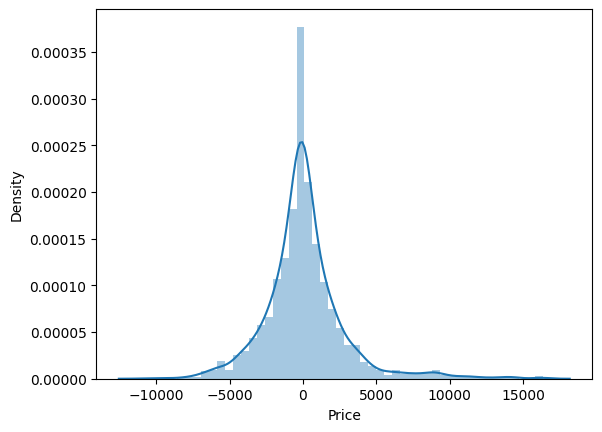

In [142]:
predict(KNeighborsRegressor())

### Hyperparameter tune our Model

In [143]:
reg_rf = RandomForestRegressor()

In [144]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]

In [145]:
random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [146]:
rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=5 , n_jobs=-1 , verbose=2)

In [147]:
rf_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Khaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [148]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 21}

In [149]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=21, max_features='auto', min_samples_split=15,
                      n_estimators=760)

In [150]:
rf_random.best_score_

0.750289169578578

In [151]:
rf_final_model = rf_random.best_estimator_

In [152]:
file = r"D:\DataScience Projects Udemy\Project 1\1..Flight_Price--_ Machine Learning\rf_model.pkl"

In [153]:
with open(file,"wb") as f:
    pickle.dump(rf_final_model, f)